Going to model the data here.

In [88]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')

In [89]:
ic = (0, 150)
ac = (50, .1, 1)

def func(x, GB, kr, GP, h=2.17, V=10):
    B, P = x
    dB = GB/V - kr * B * P + h
    dP = GP/V - kr * B * P + h
    return(dB, dP)

def err(params):
    GB, kr, GP = params
    ODEoutput = odeint(func, ic, data["time"], args = (GB, kr, GP))
    err = (ODEoutput[:,0] - data["Hp"])**2
    return np.sum(err)

bounds = ([-100, 100], [0.01, 1], [-100, 100])
sol = minimize(err, x0 = ac)
print(sol)

c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\mdsnb\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


      fun: 607313.0836422091
 hess_inv: array([[ 1.08239252,  0.04489839, -0.6993879 ],
       [ 0.04489839,  1.02440877, -0.36191471],
       [-0.6993879 , -0.36191471,  0.56029069]])
      jac: array([-68.3359375, -25.2734375, 470.1640625])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 272
      nit: 2
     njev: 65
   status: 2
  success: False
        x: array([ 864.21910252, 1325.56671959, 2756.58151488])


TypeError: bad operand type for unary -: 'tuple'

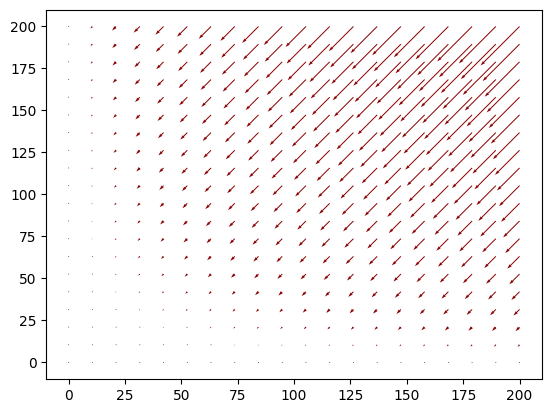

In [90]:
plotdf(func, # Function giving the rhs of the diff. eq. system
     np.array([0,200]), # [xmin,xmax]
     np.array([0,200]),# [ymin,ymax]
     [(0,150)], # list of initial values for trajectories (optional)
     # Additional parameters for `f` (optional)
     parameters={"GB":50,"kr":0.3,"GP":0.01},
     gridsteps=20,
     nsteps = 10000,
     tmax=20)

plt.xlabel("B, concentration of hemoglobin (g/dL)")
plt.ylabel("P, concentration of haptoglobin (g/dL)")

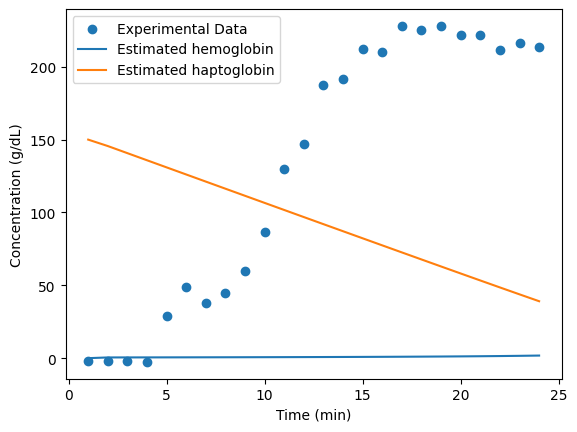

In [ ]:
fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1], sol.x[2]))
plt.scatter(data["time"], data['Hp'], label = "Experimental Data")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (g/dL)")
plt.legend()